# **1. Cargue en un Dataframe los datos de los accidentes de los últimos 3 años**

In [53]:
import pandas as pd
import numpy as np

# Cargar los archivos CSV de los ultimos 3 años
df_2021 = pd.read_csv('/kaggle/input/atus2020-2023/conjunto_de_datos/atus_anual_2021.csv', index_col = False) #para que no tome la primer columna como index
df_2022 = pd.read_csv('/kaggle/input/atus2020-2023/conjunto_de_datos/atus_anual_2022.csv')
df_2023 = pd.read_csv('/kaggle/input/atus2020-2023/conjunto_de_datos/atus_anual_2023.csv')

# Concatenar todos los DataFrames en uno solo
df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df)

         COBERTURA  ID_ENTIDAD  ID_MUNICIPIO  ANIO  MES  ID_HORA  ID_MINUTO  \
0        Municipal           1             1  2021    1        0          0   
1        Municipal           1             1  2021    1        0          0   
2        Municipal           1             1  2021    1        0          0   
3        Municipal           1             1  2021    1        0          0   
4        Municipal           1             1  2021    1        0         50   
...            ...         ...           ...   ...  ...      ...        ...   
1145648  Municipal          32            56  2023   12       14         45   
1145649  Municipal          32            56  2023   12       21         40   
1145650  Municipal          32            56  2023   12       14         30   
1145651  Municipal          32            56  2023   12        0          0   
1145652  Municipal          32            56  2023   12       18          0   

         ID_DIA  DIASEMANA                        U

In [58]:
df = df.dropna()
df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,...,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


# **2. Agregue una columna tipo date formada por los valores de las columnas correspondientes a Año, Mes, Dia, Hora y Minuto.**

In [97]:
#columna de fechas
df['FECHA'] = df['ANIO'].astype(str) + '-' + df['MES'].astype(str) + '-' + df['ID_DIA'].astype(str) + ' ' + df['ID_HORA'].astype(str) + ':' + df['ID_MINUTO'].astype(str)

df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-1-1 0:0
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-1-1 0:0
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,2021-1-1 0:0
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-1-1 0:0
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,...,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-1-1 0:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27 14:45
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27 21:40
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29 14:30
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30 0:0


# **3. Agregue una columna para Área cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.**

In [100]:
def fill_area(row):
    if 'Sin accidente en esta zona' not in row["URBANA"]:
        return 'Urbana'
    elif 'Sin accidente en esta zona' not in row["SUBURBANA"]:
        return 'Suburbana'
    else:
        return 'NA'

In [101]:
df['AREA'] = df.apply(lambda dato: fill_area(dato), axis=1)
print(df['AREA'])

0          Urbana
1          Urbana
2          Urbana
3          Urbana
4          Urbana
            ...  
1145648    Urbana
1145649    Urbana
1145650    Urbana
1145651    Urbana
1145652    Urbana
Name: AREA, Length: 1145653, dtype: object


In [103]:
def fill_zone(row):
    if 'Sin accidente en esta zona' not in row['URBANA']:
        return row['URBANA']
    elif 'Sin accidente en esta zona' not in row['SUBURBANA']:
        return row['SUBURBANA']
    else:
        return 'NA'

# **4. Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente**

In [104]:
df['ZONA'] = df.apply(fill_zone, axis=1)
print(df['ZONA'])

0             Accidente en intersección
1             Accidente en intersección
2             Accidente en intersección
3             Accidente en intersección
4             Accidente en intersección
                       ...             
1145648    Accidente en no intersección
1145649    Accidente en no intersección
1145650    Accidente en no intersección
1145651    Accidente en no intersección
1145652    Accidente en no intersección
Name: ZONA, Length: 1145653, dtype: object


# **5. Elimine las columnas URBANA y SUBURBANA**

In [105]:
df = df.drop(['URBANA', 'SUBURBANA'], axis=1)
df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA,AREA,ZONA
0,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-1-1 0:0,Urbana,Accidente en intersección
1,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-1-1 0:0,Urbana,Accidente en intersección
2,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con peatón (atropellamiento),...,0,0,0,0,0,Fatal,Cifras Definitivas,2021-1-1 0:0,Urbana,Accidente en intersección
3,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con objeto fijo,...,0,0,0,0,0,No fatal,Cifras Definitivas,2021-1-1 0:0,Urbana,Accidente en intersección
4,Municipal,1,1,2021,1,0,50,1,Viernes,Colisión con peatón (atropellamiento),...,0,0,0,0,0,No fatal,Cifras Definitivas,2021-1-1 0:50,Urbana,Accidente en intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145648,Municipal,32,56,2023,12,14,45,27,Miercoles,Volcadura,...,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27 14:45,Urbana,Accidente en no intersección
1145649,Municipal,32,56,2023,12,21,40,27,Miercoles,Colisión con motocicleta,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27 21:40,Urbana,Accidente en no intersección
1145650,Municipal,32,56,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29 14:30,Urbana,Accidente en no intersección
1145651,Municipal,32,56,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,...,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30 0:0,Urbana,Accidente en no intersección


In [107]:
df.columns

Index(['COBERTURA', 'ID_ENTIDAD', 'ID_MUNICIPIO', 'ANIO', 'MES', 'ID_HORA',
       'ID_MINUTO', 'ID_DIA', 'DIASEMANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ',
       'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION',
       'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC',
       'CAUSAACCI', 'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'ID_EDAD',
       'CONDMUERTO', 'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO',
       'PEATHERIDO', 'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO',
       'NEMUERTO', 'NEHERIDO', 'CLASACC', 'ESTATUS', 'FECHA', 'AREA', 'ZONA'],
      dtype='object')

# **6. Determine cual municipio de cada estado tuvo más meses sin accidentes**

In [109]:
mes_acc = df.groupby(["ID_ENTIDAD", "ID_MUNICIPIO", "MES"])["MES"].count().rename('ACCIDENTES')
mes_acc = mes_acc.reset_index()
mes_acc

,ID_ENTIDAD,ID_MUNICIPIO,MES,ACCIDENTES
0,1,1,1,785
1,1,1,2,773
2,1,1,3,843
3,1,1,4,833
4,1,1,5,943
...,...,...,...,...
27847,32,56,8,122
27848,32,56,9,142
27849,32,56,10,140
27850,32,56,11,149


In [110]:
mes_acc.groupby(["ID_ENTIDAD", "ID_MUNICIPIO"])["MES"].count().reset_index(name='MESES_SIN_ACCIDENTES')

,ID_ENTIDAD,ID_MUNICIPIO,MESES_SIN_ACCIDENTES
0,1,1,12
1,1,2,12
2,1,3,12
3,1,4,12
4,1,5,12
...,...,...,...
2348,32,49,12
2349,32,51,12
2350,32,52,12
2351,32,55,12


In [111]:
sin_accidentes = mes_acc[mes_acc["ACCIDENTES"] == 0]
sin_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,MES,ACCIDENTES


In [112]:
mes_accidentes = df.groupby(["ID_ENTIDAD", "ID_MUNICIPIO", "ANIO", "MES"])["MES"].count().reset_index(name='ACCIDENTES')
mes_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ACCIDENTES
0,1,1,2021,1,274
1,1,1,2021,2,244
2,1,1,2021,3,264
3,1,1,2021,4,281
4,1,1,2021,5,332
...,...,...,...,...,...
82451,32,56,2023,8,32
82452,32,56,2023,9,51
82453,32,56,2023,10,57
82454,32,56,2023,11,53


In [113]:
meses_sin_accidentes = mes_accidentes[mes_accidentes["ACCIDENTES"] == 0]
meses_sin_accidentes

,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ACCIDENTES


#  **7. Resuma los accidentes del último año por tipo y que porcentaje representan**

In [114]:
accidentes_2023 = df[df["ANIO"] == 2023]
accidentes_2023.groupby("TIPACCID")["TIPACCID"].agg(['count'])

,count
TIPACCID,
Caída de pasajero,1947
Certificado cero,15580
Colisión con animal,1026
Colisión con ciclista,3928
Colisión con ferrocarril,264
Colisión con motocicleta,57421
Colisión con objeto fijo,44233
Colisión con peatón (atropellamiento),11853
Colisión con vehículo automotor,232509


In [118]:
dfporcentajes = pd.DataFrame({'TIPO_ACCIDENTE': total_accidentes.index,
                             'CONTEO': total_accidentes.values,
                             'PORCENTAJE': porcentaje.values})
dfporcentajes

,TIPO_ACCIDENTE,CONTEO,PORCENTAJE
0,Colisión con vehículo automotor,232509,58.621429
1,Colisión con motocicleta,57421,14.477294
2,Colisión con objeto fijo,44233,11.152264
3,Certificado cero,15580,3.928114
4,Colisión con peatón (atropellamiento),11853,2.988443
5,Volcadura,11449,2.886584
6,Salida del camino,10232,2.579747
7,Otro,5805,1.463588
8,Colisión con ciclista,3928,0.990349
9,Caída de pasajero,1947,0.490888


In [115]:
total = len(accidentes_2023)
total_accidentes = accidentes_2023["TIPACCID"].value_counts() 
total_accidentes

TIPACCID
Colisión con vehículo automotor          232509
Colisión con motocicleta                  57421
Colisión con objeto fijo                  44233
Certificado cero                          15580
Colisión con peatón (atropellamiento)     11853
Volcadura                                 11449
Salida del camino                         10232
Otro                                       5805
Colisión con ciclista                      3928
Caída de pasajero                          1947
Colisión con animal                        1026
Incendio                                    381
Colisión con ferrocarril                    264
Name: count, dtype: int64

In [117]:
porcentaje = (total_accidentes / total)*100
porcentaje

TIPACCID
Colisión con vehículo automotor          58.621429
Colisión con motocicleta                 14.477294
Colisión con objeto fijo                 11.152264
Certificado cero                          3.928114
Colisión con peatón (atropellamiento)     2.988443
Volcadura                                 2.886584
Salida del camino                         2.579747
Otro                                      1.463588
Colisión con ciclista                     0.990349
Caída de pasajero                         0.490888
Colisión con animal                       0.258681
Incendio                                  0.096060
Colisión con ferrocarril                  0.066561
Name: count, dtype: float64

# **8. Obtenga la cantidad de muertos y lesionados de los últimos 3 años**

In [119]:
muertos = (df["CONDMUERTO"]+df["PASAMUERTO"]+df["PEATMUERTO"]+df["CICLMUERTO"]+df["OTROMUERTO"]+df["NEMUERTO"]).reset_index(name='MUERTOS')
muertos

,index,MUERTOS
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
1145648,1145648,0
1145649,1145649,0
1145650,1145650,0
1145651,1145651,0


In [120]:
lesionados = (df["CONDHERIDO"]+df["PASAHERIDO"]+df["PEATHERIDO"]+df["CICLHERIDO"]+df["OTROHERIDO"]+df["NEHERIDO"]).reset_index(name='LESIONADOS')
lesionados

,index,LESIONADOS
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
1145648,1145648,1
1145649,1145649,0
1145650,1145650,1
1145651,1145651,0


In [121]:
df = pd.DataFrame({'AÑO': df["ANIO"],
                              'MUERTOS': df["CONDMUERTO"]+df["PASAMUERTO"]+df["PEATMUERTO"]+df["CICLMUERTO"]+df["OTROMUERTO"]+df["NEMUERTO"],
                              'LESIONADOS': df["CONDHERIDO"]+df["PASAHERIDO"]+df["PEATHERIDO"]+df["CICLHERIDO"]+df["OTROHERIDO"]+df["NEHERIDO"]})
df

,AÑO,MUERTOS,LESIONADOS
0,2021,0,0
1,2021,0,0
2,2021,1,0
3,2021,0,1
4,2021,0,1
...,...,...,...
1145648,2023,0,1
1145649,2023,0,0
1145650,2023,0,1
1145651,2023,0,0


In [122]:
años_muertos_lesionados = df.groupby("AÑO").agg({"MUERTOS": 'sum', "LESIONADOS": 'sum'})
años_muertos_lesionados

,MUERTOS,LESIONADOS
AÑO,,
2021,4401,82466
2022,5181,91501
2023,4803,90500


In [123]:
muertos_lesionados = df.agg({"MUERTOS": 'sum', "LESIONADOS": 'sum'}).reset_index()
muertos_lesionados

,index,0
0,MUERTOS,14385
1,LESIONADOS,264467


# **9. ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?**

In [132]:
año_2021 = len(df_2021)
año_2022 = len(df_2022)
año_2023 = len(df_2023)

accidentes_año = df["AÑO"].value_counts().reset_index(name='ACCIDENTES')
accidentes_año

,AÑO,ACCIDENTES
0,2023,396628
1,2022,392710
2,2021,356315


In [133]:
def variation(row):
    if row.name < len(accidentes_año) - 1:
        año_act = row["ACCIDENTES"]
        año_ant = accidentes_año.at[row.name + 1, "ACCIDENTES"]
        variation = ((año_act-año_ant)/año_ant)*100
        return variation
    else: 
        return None

In [134]:
accidentes_año['VARIACION'] = accidentes_año.apply(variation, axis=1)
accidentes_año

,AÑO,ACCIDENTES,VARIACION
0,2023,396628,0.997683
1,2022,392710,10.214277
2,2021,356315,NaN


# **10. Histograma**

In [135]:
import matplotlib.pyplot as plt

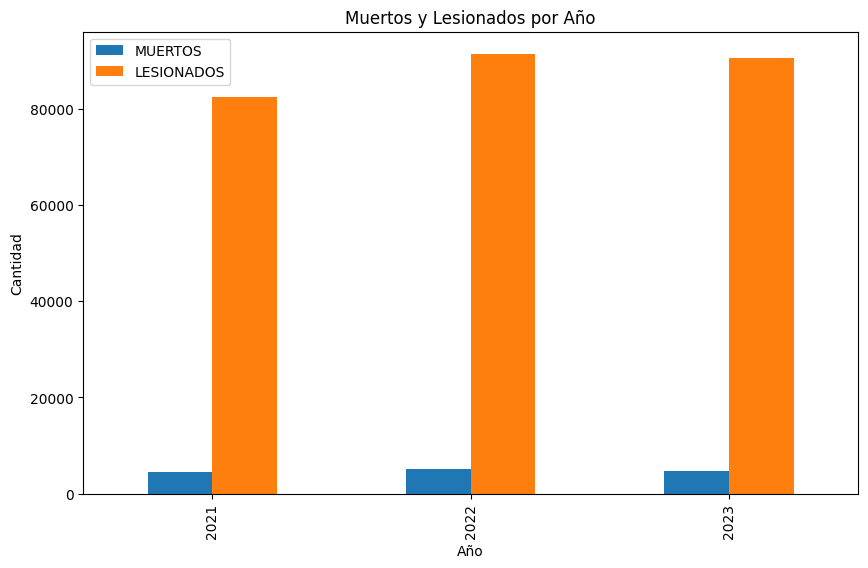

In [141]:
años_muertos_lesionados.plot(kind='bar', figsize=(10,6))

# Agregar título y etiquetas
plt.title("Muertos y Lesionados por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad")

# Mostrar gráfico
plt.show()